In [1]:
import torch
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize


In [16]:
def function_to_create_1D_video(data:np.ndarray,filename)->None:
    """
    Parameters
    ----------
    data : np.array
        2D array of data to be plotted.
        Size: time x data
    filename : str
        Name of the file to save the video.

    """
    # Step 1: Set up the figure, axis, and initial pcolormesh plot
    fig, ax = plt.subplots()

    # Initial pcolormesh plot
    line, = ax.plot(data[0, :])

    # Step 2: Define the update function for each frame
    def update(frame):
        line.set_ydata(data[frame, :])  # Update the mesh data for the current frame
        ax.set_title(f"Time Step {frame}")
        ax.set_ylim(min(data[frame, :]), max(data[frame, :]))
        return line,

    # Step 3: Create the animation
    ani = FuncAnimation(fig, update,frames = data.shape[0])

    # Step 4: Save or display the animation
    ani.save(filename+'.mp4', writer='ffmpeg', fps=10)  
    return    
  
def function_to_create_2D_video(data,square_size:int,filename):
    # Step 1: Set up the figure, axis, and initial pcolormesh plot
    fig, ax = plt.subplots()

    # Initial pcolormesh plot
    mesh = ax.pcolormesh(np.reshape(data[0, :],(square_size,square_size)), shading='auto', cmap='viridis')

    norm = Normalize(vmin=np.min(data[0,:]), vmax=np.max(data[0,:]))
    # Add a color bar to show the data range
    cbar = plt.colorbar(mesh, ax=ax, norm = norm)

    # Step 2: Define the update function for each frame
    def update(frame):
        mesh.set_array(data[frame, :])  # Update the mesh data for the current frame
        ax.set_title(f"Time Step {frame}")
        norm = Normalize(vmin=np.min(data[frame,:]), vmax=np.max(data[frame,:]))
        mesh.set_norm(norm)
        cbar.update_normal(mesh)
        return mesh,

    # Step 3: Create the animation
    ani = FuncAnimation(fig, update,frames = data.shape[0])

    # Step 4: Save or display the animation
    ani.save(filename+'.mp4', writer='ffmpeg', fps=10) 
    return       

def extraction_of_data_from_h5py(filename:str)->list:
    with h5py.File(filename, "a") as f:
    # Note that the first dimension is the value of parameter, i.e. dset[:,1] is the value of the data at time t=1
        dset_real = f["time_series_real"][:,:]
        dset_imag = f["time_series_imag"][:,:]
    return([np.array(dset_real),np.array(dset_imag)])

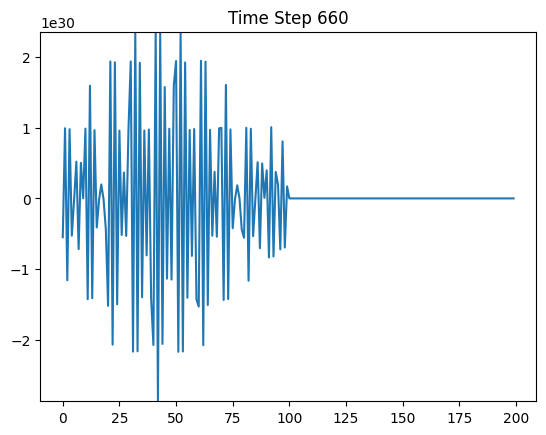

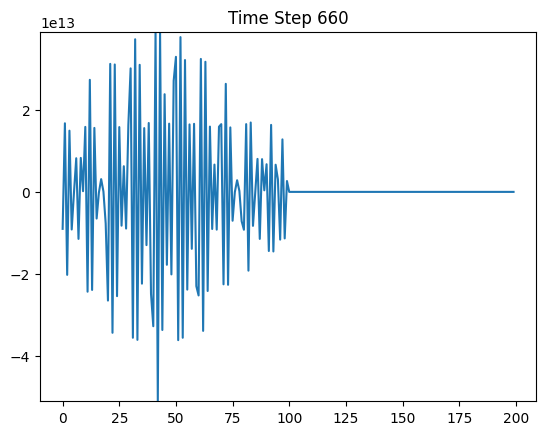

In [18]:
filename = "d_delta_R_time_evo_mu_final_-4.0.h5"
data_real,data_imag = extraction_of_data_from_h5py(filename)
function_to_create_1D_video(data_real.T,"d_delta_R_real_time_evo_final_-4.0")

function_to_create_1D_video(data_imag.T,"d_delta_R_imag_time_evo_final_-4.0")

/tmp/ipykernel_40713/926349612.py:22: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(min(data[frame, :]), max(data[frame, :]))


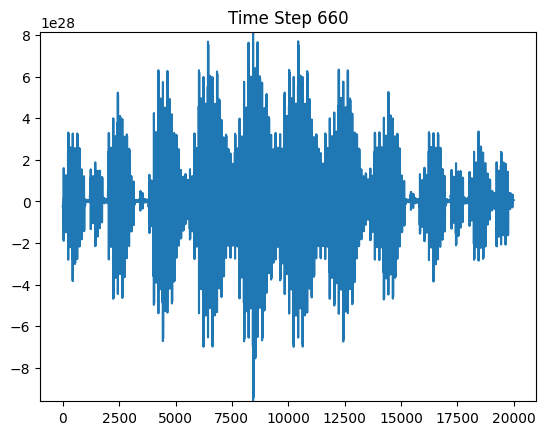

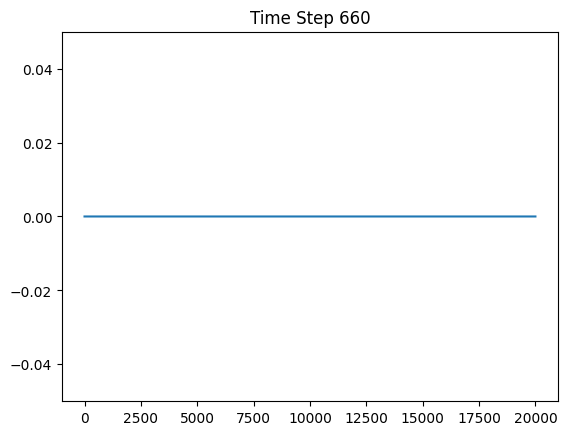

In [22]:
filename = "time_derivative_data_time_evo_mu_final_-4.0.h5"
data_real,data_imag = extraction_of_data_from_h5py(filename)
function_to_create_1D_video(data_real.T,"time_derivative_data_real_time_evo_mu_final_-4.0")
function_to_create_1D_video(data_imag.T,"time_derivative_data_imag_time_evo_mu_final_-4.0")

In [21]:
np.max(data_real)

np.float64(8.159646471150352e+28)

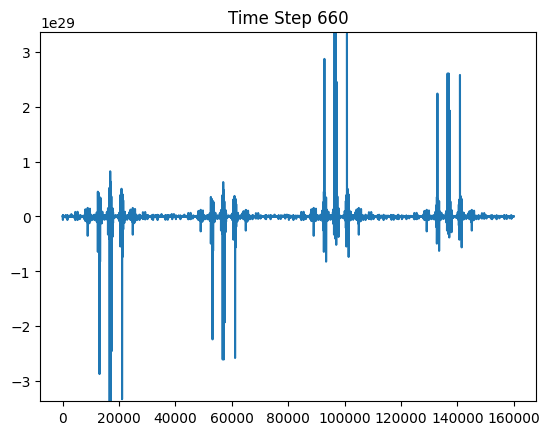

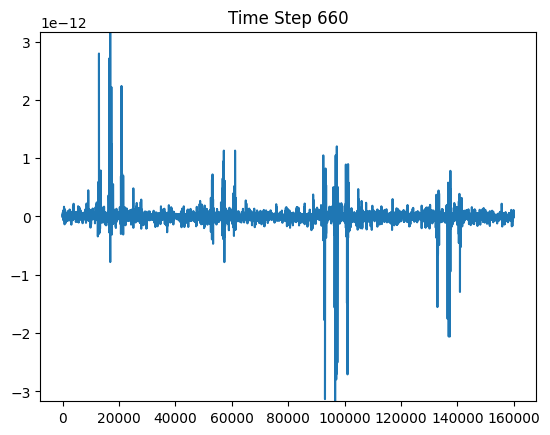

In [23]:
filename = "d_gamma_b_time_evo_mu_final_-4.0.h5"
data_real,data_imag = extraction_of_data_from_h5py(filename)
function_to_create_1D_video(data_real.T,"d_gamma_b_real_time_evo_mu_final_-4.0")
function_to_create_1D_video(data_imag.T,"d_gamma_b_imag_time_evo_mu_final_-4.0")

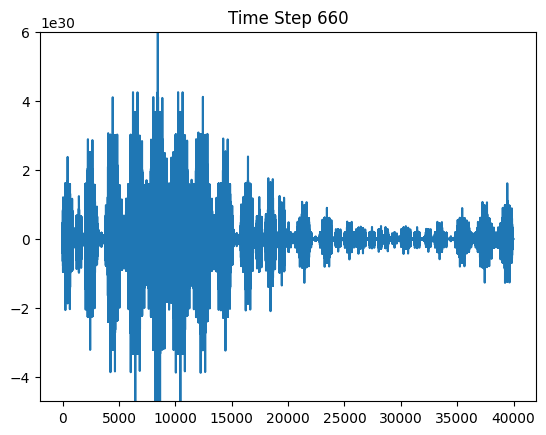

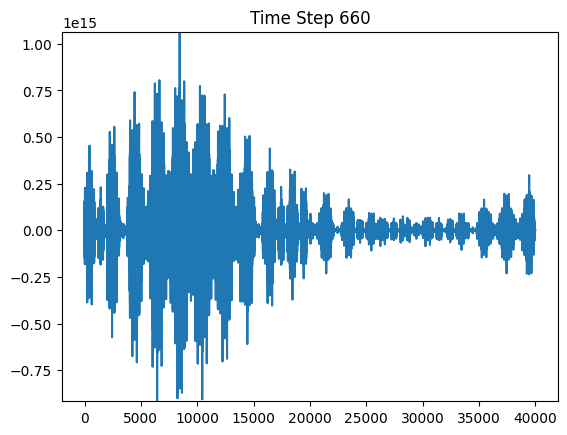

In [24]:
filename = "d_gamma_m_time_evo_mu_final_-4.0.h5"
data_real,data_imag = extraction_of_data_from_h5py(filename)
function_to_create_1D_video(data_real.T,"d_gamma_m_real_time_evo_mu_final_-4.0")
function_to_create_1D_video(data_imag.T,"d_gamma_m_imag_time_evo_mu_final_-4.0")